### Задача 1

    Даны значения зарплат из выборки выпускников:

    100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

    Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Cреднее арифметическое:

$$\overline{x} = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$$

In [54]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

summ = 0
for i in salary:
    summ = summ + i
    
mean_height  = summ/len(salary)

print("Cреднее арифметическое:", mean_height )

Cреднее арифметическое: 73.14285714285714


#### Среднее квадратичное отклонение:

$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

In [55]:

summ = 0
for i in salary:
    summ = summ + ((i - mean_height)**2)
std = (summ/len(salary))**0.5
print("Среднее квадратичное отклонение:", std)

Среднее квадратичное отклонение: 46.20686994302874


#### Смещенная и несмещенная оценки дисперсии:

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}$$

$$\sigma^2_{несмещ.} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}$$

In [56]:
summ = 0
for i in salary:
    summ = summ + ((i - mean_height)**2)
height_variance = summ/len(salary)
height_variance2 = summ/(len(salary)-1)
print("Смещенная дисперсия:", height_variance)
print("Несмещенная дисперсия:", height_variance2)

Смещенная дисперсия: 2135.074829931973
Несмещенная дисперсия: 2241.8285714285716


In [70]:
# проверим вычисления
a = np.array(salary)
print("Математическое ожидание:", a.mean())
print("Среднее квадратичное отклонение:", a.std(ddof=0))
print("Смещенная дисперсия:", a.var())
print("Несмещенная дисперсия:", a.var(ddof=1))

Математическое ожидание: 73.14285714285714
Среднее квадратичное отклонение: 46.206869943028735
Смещенная дисперсия: 2135.0748299319725
Несмещенная дисперсия: 2241.828571428571


### Задача 2

    Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

    Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [58]:
salary_sorted = sorted(salary)
length = len(salary_sorted)
b = pd.Series(salary)

print(length)
print(salary_sorted)

21
[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


In [59]:
#ввиду того, что получили нечетную длину выборки, медиана будет посередине отсортированного массива

med = salary_sorted[length//2]
print("Медиана:",med)

Медиана: 70


In [60]:
#первый квартиль
Q1 = salary_sorted[int(length // 4)]
print("Первый квартиль: Q1 =", Q1)

Первый квартиль: Q1 = 45


In [61]:
#третий квартиль
Q3 = salary_sorted[int(length *3 // 4)]
print("третий квартиль: Q3 =", Q3)

третий квартиль: Q3 = 84


In [62]:
print("Интерквартильное расстояние:")
print([Q1,Q3])

Интерквартильное расстояние:
[45, 84]


In [63]:
#проверим вычисления через встроенные библиотеки

b.describe()

count     21.000000
mean      73.142857
std       47.347952
min       17.000000
25%       45.000000
50%       70.000000
75%       84.000000
max      230.000000
dtype: float64

#### 2. выборсы в выборке

In [69]:
# Q1_Q3 - интерквартильное расстояние

Q1_Q3 = Q3 - Q1
boxplot_range_low = Q1 - 1.5 * Q1_Q3 
boxplot_range_high = Q3 + 1.5 * Q1_Q3

for i in range(len(salary)):
    if salary[i] < boxplot_range_low or salary[i] > boxplot_range_high:
        print(f'Выброс: сумма з/п {salary[i]}')

Выброс: сумма з/п 230
Выброс: сумма з/п 150


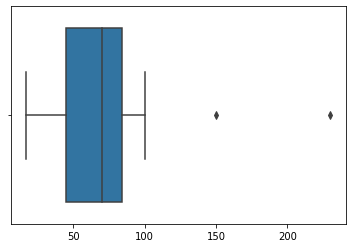

In [68]:
sns.boxplot(b, orient='h')
plt.show()

### Задача 3

    В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию.
    Какова вероятность, что он учится: 
    a) на факультете A? 
    б) на факультете B? 
    в) на факультете C?

На А и В учится по 1/4 всех студентов, а на С 1/2.

Общая вероятность сдачи сессии:

$$P(A) = P(B_A) \cdot P(A | B_A) + P(B_B) \cdot P(A | B_B) + P(B_C) \cdot P(A | B_C) = $$
$$= \dfrac{1}{4} \cdot 0.8 + \dfrac{1}{4} \cdot 0.7 + \dfrac{1}{2} \cdot 0.9 = 0.825$$

вероятность, что студент учится на факультете A:
$$ P(B_A\:|\:A) = \frac{P(A\:|\:B_A) \cdot P(B_A)}{P(A)} $$

вероятность, что студент учится на факультете В:
$$ P(B_B\:|\:A) = \frac{P(A\:|\:B_B) \cdot P(B_B)}{P(A)} $$

вероятность, что студент учится на факультете С:
$$ P(B_C\:|\:A) = \frac{P(A\:|\:B_C) \cdot P(B_C)}{P(A)} $$



$$ P(A\:|\:B_A) = 0.8 $$
$$ P(A\:|\:B_B) = 0.7 $$
$$ P(A\:|\:B_C) = 0.9 $$

Подставляем значение в каждое уравнение:
$$ P(B_A\:|\:A) = \frac{0.25 \cdot 0.8}{0.825} = 0.24 $$

$$ P(B_B\:|\:A) = \frac{0.25 \cdot 0.7}{0.825} = 0.21 $$

$$ P(B_C\:|\:A) = \frac{0.5 \cdot 0.9}{0.825} = 0.545 $$
